In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
raw_benchmark_results = pd.read_csv('../benchmarks/2020-12-01-fast-snake-lookup.csv')

if 'generation_config_i' not in raw_benchmark_results.columns:
    # HACK Old benchmarks did not have generation_config_i. This adds it, but in a completely hardcoded unstable way.
    # This is sort of ok, since there was only 1 old benchmark like this.
    raw_benchmark_results['generation_config_i'] = np.arange(len(raw_benchmark_results)) // 18

raw_benchmark_results.sample(5)

,generation_config_i,input_strategy,input_length_1,input_change_strength,input_chunkiness,input_distribution,regen_i,repetition_i,diff_program,micros_for_file_read,micros_for_all_snakes,micros_for_edit_len
27116,313,add,292,1.0,0.0,zipf,1,2,all_snakes_fast_lookup_2_vec,464,2020,2756
8499,292,remove,292,0.4,1.0,zipf,2,0,all_snakes_fast_lookup_xwise,440,731,685
12465,126,remove,6,0.8,1.0,zipf,2,0,all_snakes_fast_lookup_kwise_eq,368,1,9
2507,85,addremove,2,1.0,0.0,zipf,2,2,all_snakes_fast_lookup_2_vec_eq,377,11,1
4181,163,remove,17,0.6,1.0,zipf,1,2,sequential,371,1,10


In [3]:
indexed_benchmark_results = raw_benchmark_results.set_index(['generation_config_i', 'regen_i', 'diff_program', 'repetition_i'])
indexed_benchmark_results

input_strategy  \
generation_config_i regen_i diff_program                    repetition_i                  
36                  0       sequential                      0               independent   
                                                            1               independent   
                                                            2               independent   
                            all_snakes_fast_lookup_2_vec    0               independent   
                                                            1               independent   
...                                                                                 ...   
242                 2       all_snakes_fast_lookup_xwise    1                       add   
                                                            2                       add   
                            all_snakes_fast_lookup_xwise_eq 0                       add   
                                                            1                       add   
                                                            2                       add   

                                                                          input_length_1  \
generation_config_i regen_i diff_program                    repetition_i                   
36                  0       sequential                      0                          1   
                                                            1                          1   
                                                            2                          1   
                            all_snakes_fast_lookup_2_vec    0                          1   
                                                            1                          1   
...                                                                                  ...   
242                 2       all_snakes_fast_lookup_xwise    1                        113   
                                                            2                        113   
                            all_snakes_fast_lookup_xwise_eq 0                        113   
                                                            1                        113   
                                                            2                        113   

                                                                          input_change_strength  \
generation_config_i regen_i diff_program                    repetition_i                          
36                  0       sequential                      0                               1.0   
                                                            1                               1.0   
                                                            2                               1.0   
                            all_snakes_fast_lookup_2_vec    0                               1.0   
                                                            1                               1.0   
...                                                                                         ...   
242                 2       all_snakes_fast_lookup_xwise    1                               0.4   
                                                            2                               0.4   
                            all_snakes_fast_lookup_xwise_eq 0                               0.4   
                                                            1                               0.4   
                                                            2                               0.4   

                                                                          input_chunkiness  \
generation_config_i regen_i diff_program                    repetition_i                     
36                  0       sequential                      0                          0.0   
                                                            1                          0.0   
                            

In [4]:
unique_regen_i_values = sorted(np.unique(indexed_benchmark_results.index.get_level_values('regen_i').values))

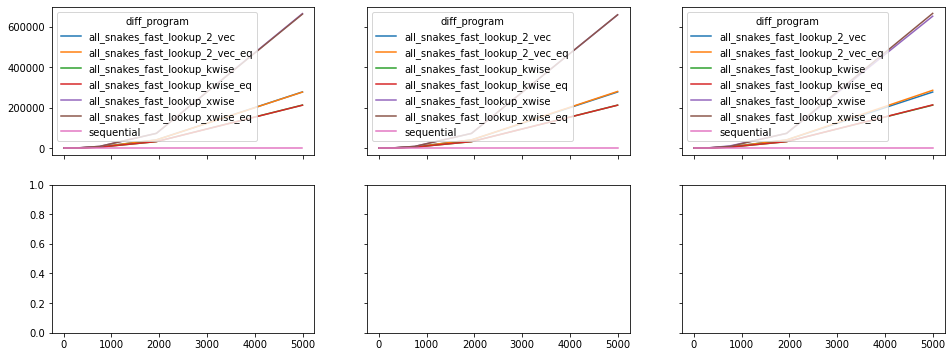

In [6]:
fig, ax = plt.subplots(2, len(unique_regen_i_values), figsize=(16, 6), sharex=True, sharey='row')
for regen_i in unique_regen_i_values:
    temp = indexed_benchmark_results.groupby(['generation_config_i', 'regen_i', 'diff_program']).min()
    temp = temp[temp['input_strategy'] == 'independent']
    temp = temp.xs(regen_i, level='regen_i')
    temp = temp.set_index('input_length_1', append=True)
    temp = temp.unstack('diff_program')['micros_for_all_snakes']
    temp = temp.droplevel('generation_config_i')
    temp = temp.sort_index()

    temp.plot(ax=ax[0][regen_i]);
    #(temp.all_snakes_fast_lookup / temp.sequential).plot(ax=ax[1][regen_i]);

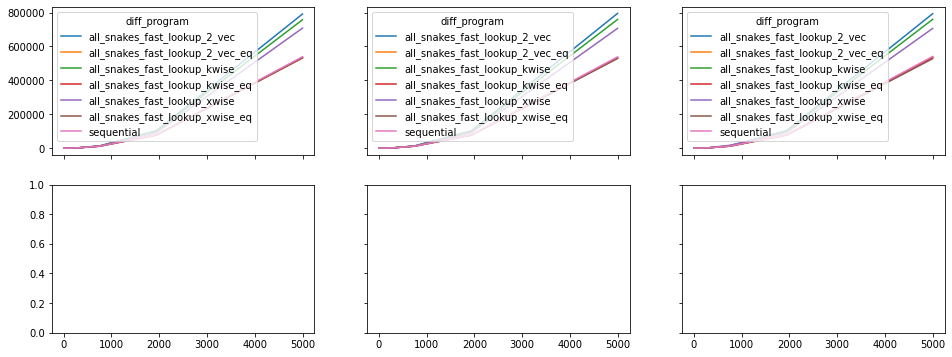

In [7]:
fig, ax = plt.subplots(2, len(unique_regen_i_values), figsize=(16, 6), sharex=True, sharey='row')
for regen_i in unique_regen_i_values:
    temp = indexed_benchmark_results.groupby(['generation_config_i', 'regen_i', 'diff_program']).min()
    temp = temp[temp['input_strategy'] == 'independent']
    temp = temp.xs(regen_i, level='regen_i')
    temp = temp.set_index('input_length_1', append=True)
    temp = temp.unstack('diff_program')['micros_for_edit_len']
    temp = temp.droplevel('generation_config_i')
    temp = temp.sort_index()

    temp.plot(ax=ax[0][regen_i]);
    #(temp.all_snakes_fast_lookup / temp.sequential).plot(ax=ax[1][regen_i]);

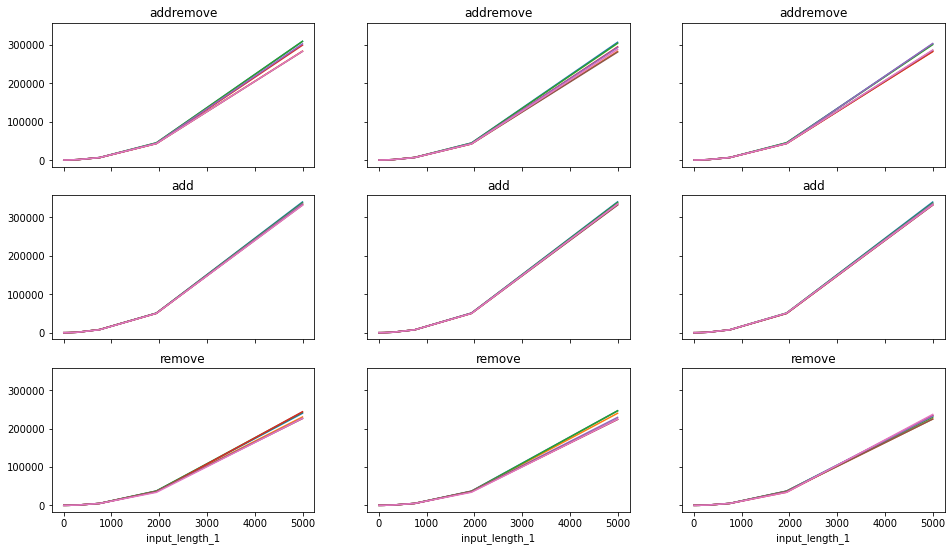

In [8]:
fig, ax = plt.subplots(3, len(unique_regen_i_values), figsize=(16, 9), sharex=True, sharey=True)
for input_strategy_i, input_strategy in enumerate(['addremove', 'add', 'remove']):
    for regen_i in unique_regen_i_values:
        temp = indexed_benchmark_results.groupby(['generation_config_i', 'regen_i', 'diff_program']).min()
        temp = temp[(temp['input_strategy'] == input_strategy) & (temp['input_change_strength'] == 0.2) & (temp['input_chunkiness'] == 0.5)]
        temp = temp.xs(regen_i, level='regen_i')
        temp = temp.set_index('input_length_1', append=True)
        temp = temp.unstack('diff_program')['micros_for_edit_len']
        temp = temp.droplevel('generation_config_i')
        temp = temp.sort_index()

        temp.plot(ax=ax[input_strategy_i][regen_i], legend=False, title=input_strategy);

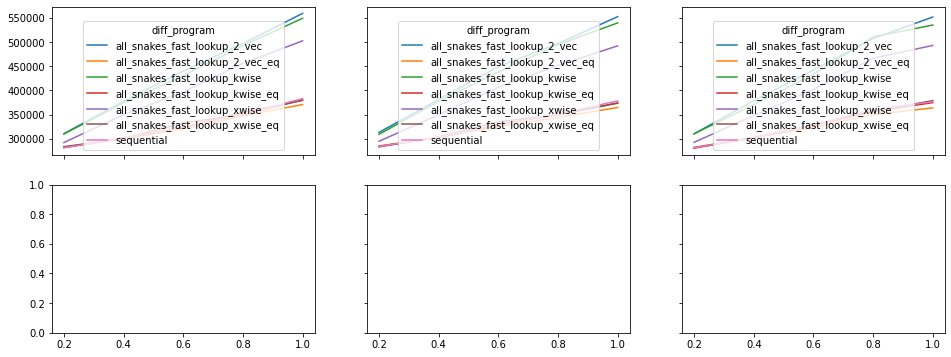

In [10]:
fig, ax = plt.subplots(2, len(unique_regen_i_values), figsize=(16, 6), sharex=True, sharey='row')
for regen_i in unique_regen_i_values:
    temp = indexed_benchmark_results.groupby(['generation_config_i', 'regen_i', 'diff_program']).min()
    temp = temp[(temp['input_strategy'] == 'addremove') & (temp['input_length_1'] == temp['input_length_1'].max()) & (temp['input_chunkiness'] == 0)]
    temp = temp.xs(regen_i, level='regen_i')
    temp = temp.set_index('input_change_strength', append=True)
    temp = temp.unstack('diff_program')['micros_for_edit_len']
    temp = temp.droplevel('generation_config_i')
    temp = temp.sort_index()

    temp.plot(ax=ax[0][regen_i]);
    #(temp.all_snakes_fast_lookup / temp.sequential).plot(ax=ax[1][regen_i]);

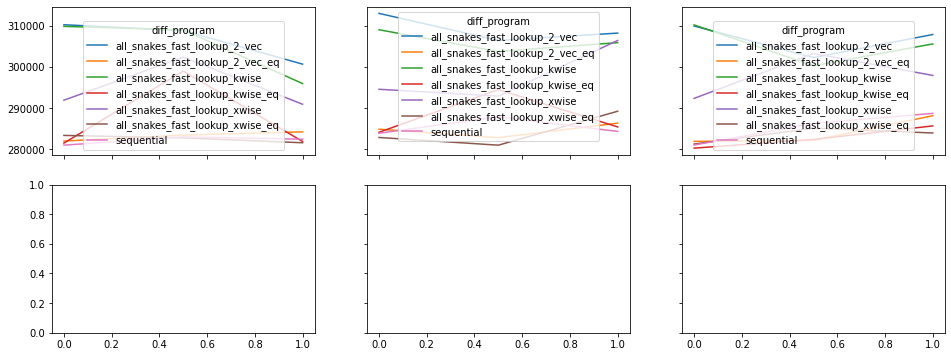

In [11]:
fig, ax = plt.subplots(2, len(unique_regen_i_values), figsize=(16, 6), sharex=True, sharey='row')
for regen_i in unique_regen_i_values:
    temp = indexed_benchmark_results.groupby(['generation_config_i', 'regen_i', 'diff_program']).min()
    temp = temp[(temp['input_strategy'] == 'addremove') & (temp['input_length_1'] == temp['input_length_1'].max()) & (temp['input_change_strength'] == 0.2)]
    temp = temp.xs(regen_i, level='regen_i')
    temp = temp.set_index('input_chunkiness', append=True)
    temp = temp.unstack('diff_program')['micros_for_edit_len']
    temp = temp.droplevel('generation_config_i')
    temp = temp.sort_index()

    temp.plot(ax=ax[0][regen_i]);
    #(temp.all_snakes_fast_lookup / temp.sequential).plot(ax=ax[1][regen_i]);

0.5910628019323672
0.7647342995169082
0.5355072463768116
0.6980676328502415
0.6318840579710145
0.7594202898550725
0.4357487922705314
0.4461352657004831
0.33502415458937196
0.33816425120772947
0.4468599033816425
0.4282608695652174


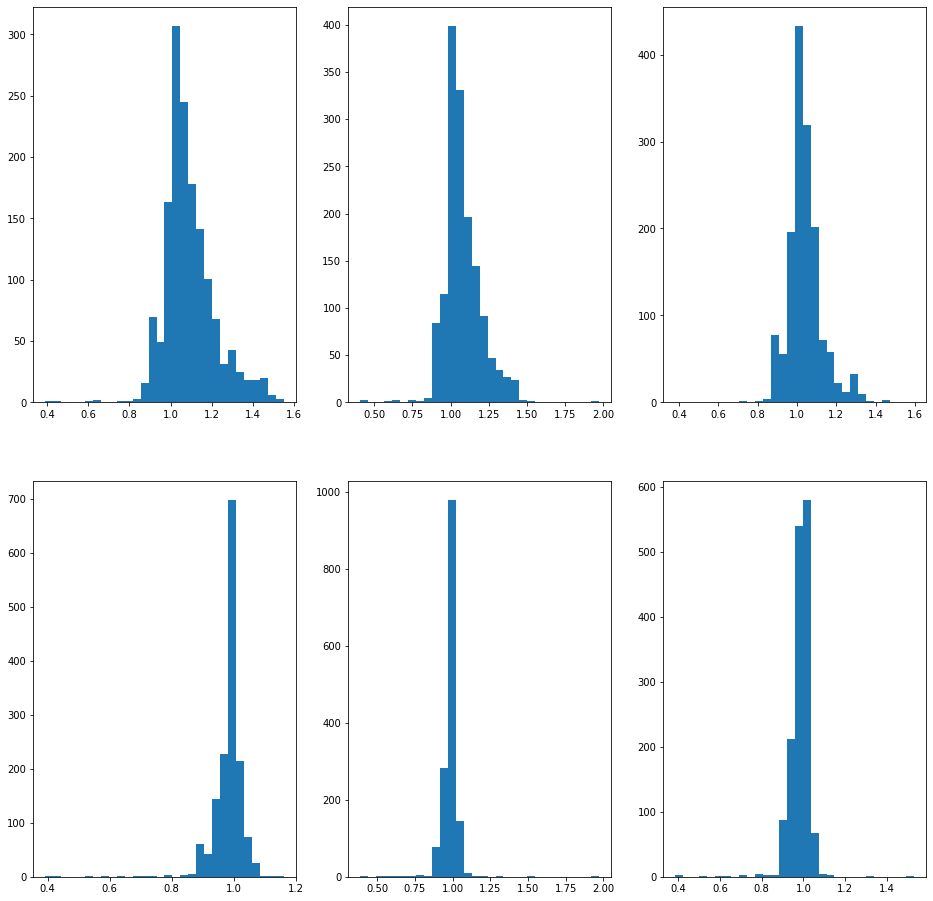

In [14]:
temp = indexed_benchmark_results['micros_for_edit_len'].unstack('diff_program')
print((temp.all_snakes_fast_lookup_2_vec < temp.sequential).mean())
print((temp.all_snakes_fast_lookup_2_vec_eq < temp.sequential).mean())
print((temp.all_snakes_fast_lookup_kwise < temp.sequential).mean())
print((temp.all_snakes_fast_lookup_kwise_eq < temp.sequential).mean())
print((temp.all_snakes_fast_lookup_xwise < temp.sequential).mean())
print((temp.all_snakes_fast_lookup_xwise_eq < temp.sequential).mean())

print((temp.all_snakes_fast_lookup_2_vec < 0.9 * temp.sequential).mean())
print((temp.all_snakes_fast_lookup_2_vec_eq < 0.9 * temp.sequential).mean())
print((temp.all_snakes_fast_lookup_kwise < 0.9 * temp.sequential).mean())
print((temp.all_snakes_fast_lookup_kwise_eq < 0.9 * temp.sequential).mean())
print((temp.all_snakes_fast_lookup_xwise < 0.9 * temp.sequential).mean())
print((temp.all_snakes_fast_lookup_xwise_eq < 0.9 * temp.sequential).mean())

fig, ax = plt.subplots(2, 3, figsize=(16, 16))
hist_values = temp.all_snakes_fast_lookup_2_vec / temp.sequential
hist_values = hist_values[(hist_values < 50) & (temp.sequential > 1000)]
ax[0, 0].hist(hist_values, bins=30);

hist_values = temp.all_snakes_fast_lookup_2_vec_eq / temp.sequential
hist_values = hist_values[(hist_values < 50) & (temp.sequential > 1000)]
ax[1, 0].hist(hist_values, bins=30);


hist_values = temp.all_snakes_fast_lookup_kwise / temp.sequential
hist_values = hist_values[(hist_values < 50) & (temp.sequential > 1000)]
ax[0, 1].hist(hist_values, bins=30);

hist_values = temp.all_snakes_fast_lookup_kwise_eq / temp.sequential
hist_values = hist_values[(hist_values < 50) & (temp.sequential > 1000)]
ax[1, 1].hist(hist_values, bins=30);

hist_values = temp.all_snakes_fast_lookup_xwise / temp.sequential
hist_values = hist_values[(hist_values < 50) & (temp.sequential > 1000)]
ax[0, 2].hist(hist_values, bins=30);

hist_values = temp.all_snakes_fast_lookup_xwise_eq / temp.sequential
hist_values = hist_values[(hist_values < 50) & (temp.sequential > 1000)]
ax[1, 2].hist(hist_values, bins=30);

0.03888888888888889
0.03985507246376811
0.08405797101449275
0.08115942028985507
0.08502415458937199
0.08067632850241546


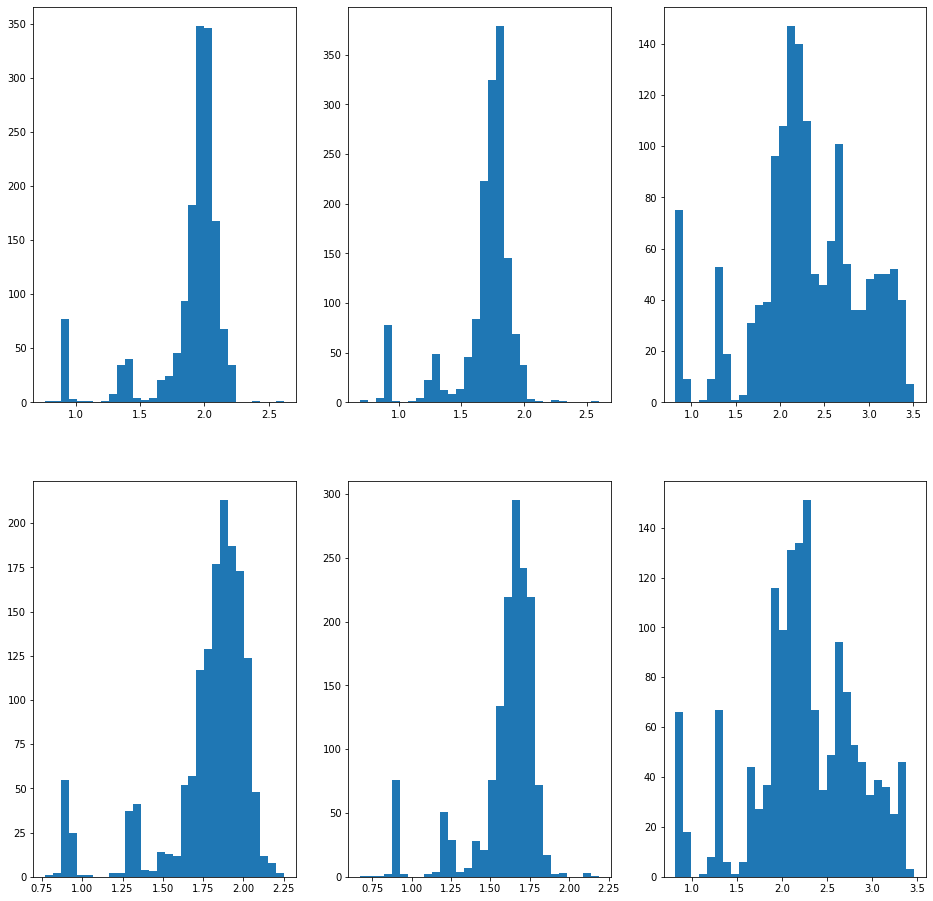

In [15]:
temp2 = indexed_benchmark_results['micros_for_all_snakes'].unstack('diff_program')
temp.all_snakes_fast_lookup_2_vec += temp2.all_snakes_fast_lookup_2_vec
temp.all_snakes_fast_lookup_2_vec_eq += temp2.all_snakes_fast_lookup_2_vec_eq
temp.all_snakes_fast_lookup_kwise += temp2.all_snakes_fast_lookup_kwise
temp.all_snakes_fast_lookup_kwise_eq += temp2.all_snakes_fast_lookup_kwise_eq
temp.all_snakes_fast_lookup_xwise += temp2.all_snakes_fast_lookup_xwise
temp.all_snakes_fast_lookup_xwise_eq += temp2.all_snakes_fast_lookup_xwise_eq

print((temp.all_snakes_fast_lookup_2_vec < temp.sequential).mean())
print((temp.all_snakes_fast_lookup_2_vec_eq < temp.sequential).mean())
print((temp.all_snakes_fast_lookup_kwise < temp.sequential).mean())
print((temp.all_snakes_fast_lookup_kwise_eq < temp.sequential).mean())
print((temp.all_snakes_fast_lookup_xwise < temp.sequential).mean())
print((temp.all_snakes_fast_lookup_xwise_eq < temp.sequential).mean())

fig, ax = plt.subplots(2, 3, figsize=(16, 16))
hist_values = temp.all_snakes_fast_lookup_2_vec / temp.sequential
hist_values = hist_values[(hist_values < 50) & (temp.sequential > 1000)]
ax[0, 0].hist(hist_values, bins=30);

hist_values = temp.all_snakes_fast_lookup_2_vec_eq / temp.sequential
hist_values = hist_values[(hist_values < 50) & (temp.sequential > 1000)]
ax[1, 0].hist(hist_values, bins=30);


hist_values = temp.all_snakes_fast_lookup_kwise / temp.sequential
hist_values = hist_values[(hist_values < 50) & (temp.sequential > 1000)]
ax[0, 1].hist(hist_values, bins=30);

hist_values = temp.all_snakes_fast_lookup_kwise_eq / temp.sequential
hist_values = hist_values[(hist_values < 50) & (temp.sequential > 1000)]
ax[1, 1].hist(hist_values, bins=30);

hist_values = temp.all_snakes_fast_lookup_xwise / temp.sequential
hist_values = hist_values[(hist_values < 50) & (temp.sequential > 1000)]
ax[0, 2].hist(hist_values, bins=30);

hist_values = temp.all_snakes_fast_lookup_xwise_eq / temp.sequential
hist_values = hist_values[(hist_values < 50) & (temp.sequential > 1000)]
ax[1, 2].hist(hist_values, bins=30);